#### Monticarlo simulations

##### Metropolis Hastings - How to sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Define a function f(x) which is the numerator of p(x) which is the function of interest we need samples from (p(x) is the target distribution).

In [2]:
#this function is the numerator of the target distribution
def f(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else: 
        return np.exp((x-1)/3) + np.exp((x-1)**3)

In [3]:
# define the normal PDF
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

Generally p(x) cannot be found, therefore we use f(x). However in this case we still can find the normalizing constant and therefore p(x). Let's plot both of these functions.

In [4]:
NORM_CONST = 7.16556

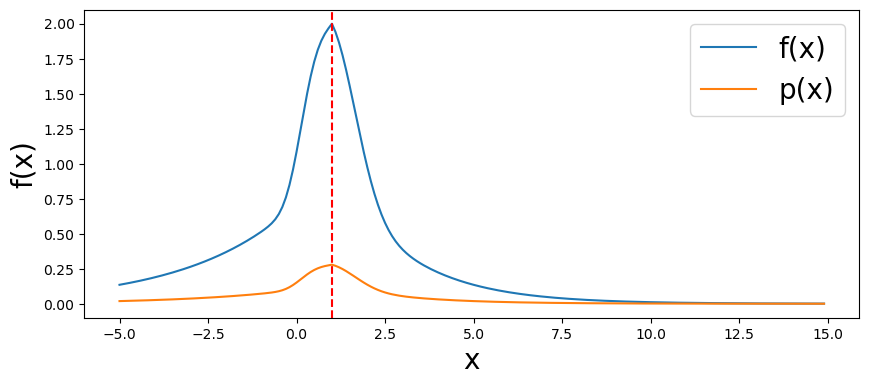

In [5]:
x_vals = np.arange(-5,15,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')
plt.show()

In [6]:
TRUE_EXP = 1.94709 / NORM_CONST
print(TRUE_EXP)

0.2717289367474419


 Metropolis Algorithm with $N(x_{prev}, 4)$ Candidate/proposal

In [7]:
%%time
#try this many candidates
N = 1000000

samples = [1]
num_accept = 0
for _ in range(N):
    #sample candidate from normal distribution
    candidate = np.random.normal(samples[-1], 4)
    
    #calculate probability of accepting this candidate
    prob = min(1, f(candidate) / f(samples[-1]))
    
    #accept with the calculated probability -  compare this to a random draw from uniform(0,1)
    if np.random.random() < prob:
        samples.append(candidate)
        num_accept += 1
        
    #otherwise report current sample again - notice the carry over if not accepted
    else:
        samples.append(samples[-1])

CPU times: user 5.05 s, sys: 0 ns, total: 5.05 s
Wall time: 5.07 s


In [8]:
len(samples)

1000001

In [9]:
burn_in = 1000
retained_samples = samples[burn_in+1:]

In [10]:
print("Num Samples Collected: %s"%len(retained_samples))

Num Samples Collected: 999000


In [11]:
print("Fraction Acceptances: %s"%(num_accept / N))

Fraction Acceptances: 0.486216


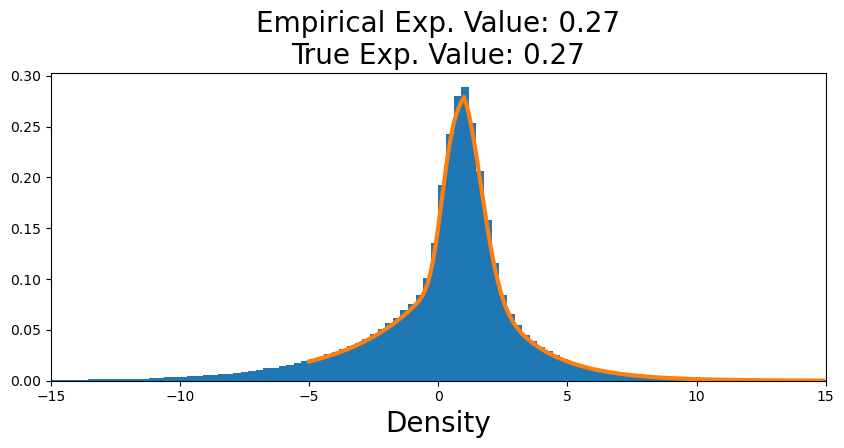

In [12]:
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=3)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(retained_samples), 2), round(np.mean(TRUE_EXP), 2)), fontsize=20)
plt.show()

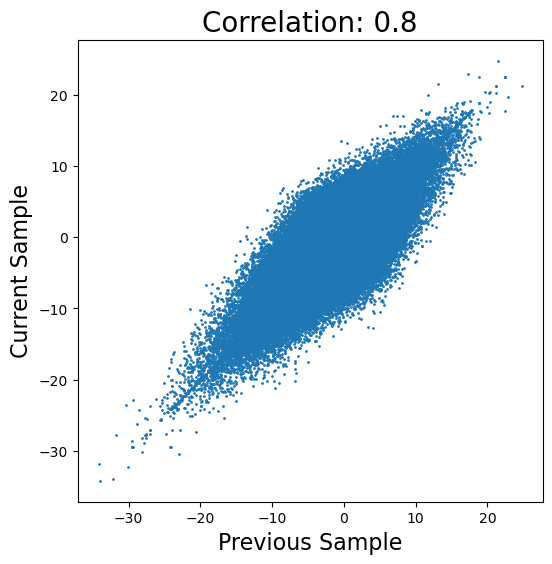

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(retained_samples[:-1], retained_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)
plt.show()